In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.corpus import stopwords

# Data Understanding

In [3]:

df_train = pd.read_csv('../data/train.csv')

In [5]:
df_train.head(5)

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [6]:
df_train.describe()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
count,19661,19661,19661,19661,19661
unique,14316,14271,45,130,130
top,170113f9-399c-489e-ab53-2faf5c64c5bc,Science and Engineering Indicators 2014,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
freq,22,22,6144,3673,3673


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
 5   cnt            19661 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 921.7+ KB


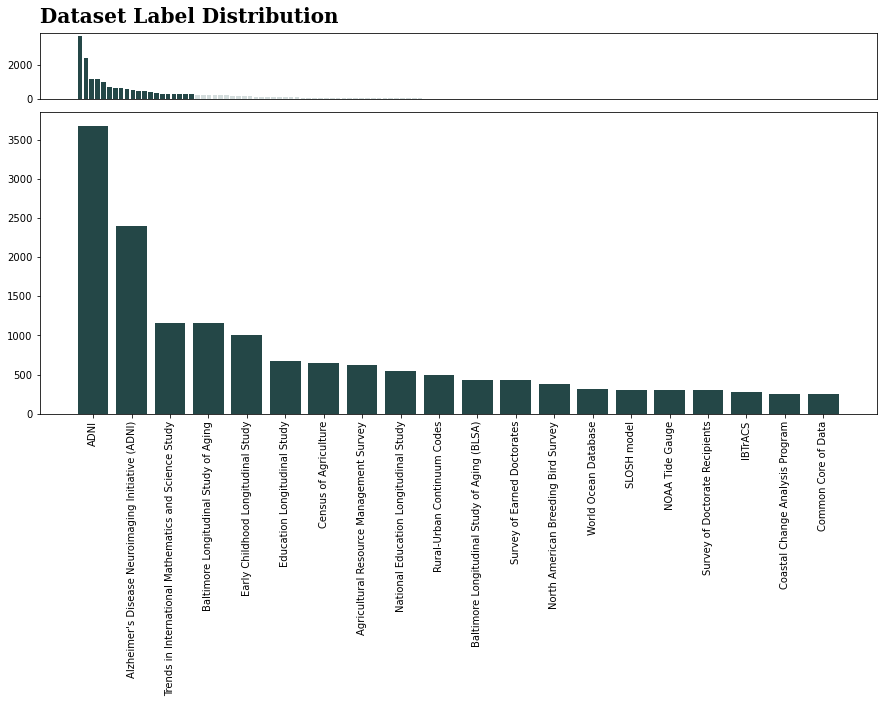

In [8]:
dataset_label = df_train['dataset_label'].value_counts()[:20]
fig = plt.figure(figsize=(15, 7))

gs = fig.add_gridspec(5, 6)

ax1 = fig.add_subplot(gs[0,:])
dataset_label = df_train['dataset_label'].value_counts()
ax1.bar(dataset_label.index, dataset_label,
       color=['#244747']*20 + ['#d4dddd']*(len(dataset_label) - 20)
       )
ax1.set_xticks([])


ax2 = fig.add_subplot(gs[1:,:])
dataset_label = df_train['dataset_label'].value_counts()[:20]
ax2.bar(dataset_label.index, dataset_label,
        color='#244747'
       )
ax2.set_xticks(range(len(dataset_label.index)))
ax2.set_xticklabels(dataset_label.index, rotation = 90)


fig.text(0.125,0.9,'Dataset Label Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

In [12]:
def text_prep(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()


Clean 'pub_title' column using text_prep funcation.

In [16]:
import re
pub_title_clean = df_train['pub_title'].apply(lambda x: text_prep(x))

In [17]:
pub_title_clean

0        the impact of dual enrollment on college degre...
1        educational attainment of high school dropouts...
2        differences in outcomes for female and male st...
3        stepping stone and option value in a model of ...
4        parental effort school resources and student a...
                               ...                        
19656    rsna international trends a global perspective...
19657    mccs a novel recognition pattern based method ...
19658    quantitative structure activity relationship m...
19659    a ligand based computational drug repurposing ...
19660    a ligand based computational drug repurposing ...
Name: pub_title, Length: 19661, dtype: object

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



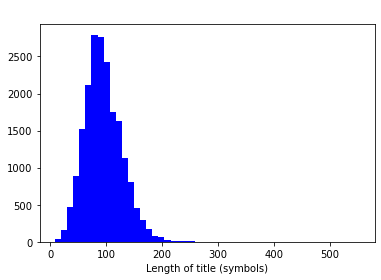

In [18]:
pub_title_len = pub_title_clean.str.len()

plt.title('Title length', size = 15, color = 'white')
sns.distplot(pub_title_len, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (symbols)')
plt.show()

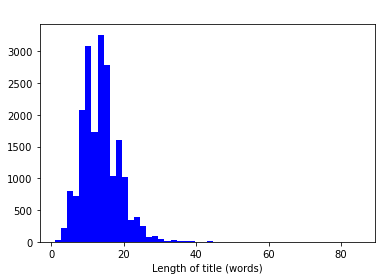

In [19]:
title_words = pub_title_clean.str.split().map(lambda x: len(x))

plt.title('Title words', size = 15, color = 'white')
sns.distplot(title_words, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Length of title (words)')
plt.show()

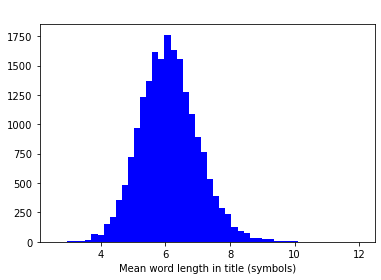

In [20]:
pub_title_len = pub_title_clean.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.title('Title words length', size = 15, color = 'white')
sns.distplot(pub_title_len, kde = False, color = 'blue', 
             hist_kws = dict(alpha = 1))
plt.xlabel('Mean word length in title (symbols)')
plt.show()

In [25]:
from collections import Counter

words = pub_title_clean.str.split().values.tolist()
title_corpus = [word for i in words for word in i]

title_counter = Counter(title_corpus)
title_most = title_counter.most_common()

stop = set(stopwords.words('english'))

title_top_words, title_top_words_count = [], []
for word, count in title_most[:100]:
    if word not in stop:
        title_top_words.append(word)
        title_top_words_count.append(count)

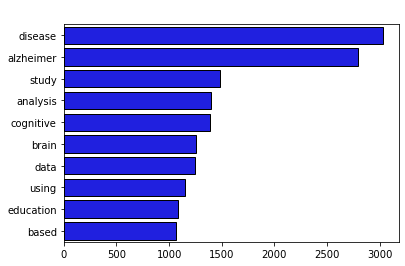

In [26]:
plt.title('TOP-10 title words', color = 'white', size = 15)
sns.barplot(y = title_top_words[:10], x = title_top_words_count[:10], 
            edgecolor = 'black', color = 'blue')
plt.show()

In [ ]:

def show_wordcloud(data, stop, mask = None, title = None, color = 'black'):
    """
    Function for creating wordclouds (with or without mask)
    """
    from wordcloud import WordCloud, ImageColorGenerator
    wordcloud = WordCloud(background_color = color,
                         stopwords = stop,
                         mask = mask,
                         max_words = 100,
                         scale = 3,
                         width = 4000, 
                         height = 2000,
                         collocations = False,
                         random_state = 1)
    
    wordcloud = wordcloud.generate(data)
    
    plt.figure(1, figsize = (16, 8), dpi = 300)
    plt.title(title, size = 15)
    plt.axis('off')
    if mask is None:
        plt.imshow(wordcloud, interpolation = "bilinear")
        plt.show()
    else:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func = image_colors), 
                   interpolation = "bilinear")
        plt.show()

In [27]:
title_word_string = ' '.join(title_corpus)
show_wordcloud(title_word_string, stop)

NameError: name 'show_wordcloud' is not defined